注：  このページはPython2.6以降のバージョンを対象に書かれています。  

# 目次
 - Pythonにおける文字列（string型）
 - 文字列の結合
     - +を使った結合
     - str.format関数
         - 基本的な使い方
         - 書式指定子
             - 具体例
             - おすすめの書式指定子
 - strクラスの便利な関数
     - str.strip
     - str.split
     - str.replace
 - 応用
     - 人口推移をプロットしてみる
         
 

# Pythonにおける文字列（string型）
Pythonで文字列を扱うための組み込みクラスとして、**string**という型があります。別の言い方として、**文字列型**や**str**などと呼ばれることもあります。  
大概の文字列操作はこのクラスだけで出来ちゃうので、マスターするとファイル入出力などで困ることがぐっと減ります。数値をフォーマットして文字列に変換したり、必要な部分を抜き出したり、特定文字を区切り文字として複数の文字列に分割したりと多機能なクラスです。  
文字列は"（ダブルクォーテーション）もしくは'（シングルクォーテーション）で囲むことで作れます（２つの違いはまったくない）。


In [1]:
s = "hello"
# s = 'hello' <-- これでもよい
type(s)

str

Cでの**char**やFortranでの**character**と違い、文字そのものも長さが１の文字列として扱います。事前に配列を定義する必要があったり、結合しているうちに最初に定義した配列サイズを超えるといったことはなく、直感的な操作が可能です。

# 文字列の結合
## +記号を使った文字列の結合
多くのスクリプト言語と同様に、文字列を結合するためには**+**記号を使います。

In [2]:
# +記号を使った文字列の結合
"hello" + "," + "world" # --> 'hello,world'

# +を使わずこんな結合もできる
"hello"",""world" # --> 'hello,world'

'hello,world'

ここで一つ注意しなければならないのは、**int**や**float**といった数値の型はstring型と「＋」を用いた結合ができないということです。数値をstring型と結合するためには、数値をstring型に明示的にキャスト（型の変換）する必要があります。

In [3]:
# 1 + "a"　#TypeError
str(1) + "a"

'1a'

このような少し面倒な仕様になっているのは、意図していない結合をした場合に必ずエラーが出るようにするためです。  
CやFortranのように型を事前に指定して変数を定義するコンパイル言語と違い、Pythonを始めとしたスクリプト言語では、変数に異なる型を代入できるために、間違った型を入れたままコードを書いてしまうことがあります。  
一例を上げると、

In [4]:
num1 = 1
num2 = "3" #ファイルからの読み取りの際、stringのままに変数に保存
num1 + num2 #TypeError

TypeError: unsupported operand type(s) for +: 'int' and 'str'

このコードを書いた人は最後の行では何をしようとしたのでしょうか？可能性は２つあります。  
- num1, num2のどちらも**string**だと思って計算し、出力では「13」を出そうとした
- num1, num2のどちらも**int**だと思って計算し、出力では「4」を出そうとした

もちろん、Pythonのインタプリタ（コードを一行ごと読み込んで実行するもの）はどちらが本来意図されていたかを知る由もないのでエラーを吐き出すわけです。  
この面倒な仕様は、スクリプト言語の宿命とも言える産物なのです。

## str.format関数
上記のような宿命は納得したとしても、さすがに毎回キャストするのは面倒です。
２つの文字列を結合するぐらいならキャストでいいかもしれませんが、大抵の場合、もっと多くの文字列を結合したいはずなので、これを簡単にする関数として**str.format**が用意されています。  
複数の文字列、数値などを連結する場合に非常によく使います。特に、科学技術計算などで数値をフォーマット（桁数を指定するなど）する際に役立ちます。  
生の文字列もstringなので、実は関数を呼び出すことができ、format関数を使うときには大抵このように記述します。

In [5]:
"正の整数で一番小さいものは、「{}」".format(1)

'正の整数で一番小さいものは、「1」'

基本的にformat関数は、文字列中の「{ }」の場所に、引数をstringにキャストして埋め込むという機能を持ちます。  
formatの引数は複数入れることも可能で、その場合、引数の個数に対応した「{}」を文字列の中に含んでいなければなりません。  

In [6]:
num1 = 1
num2 = 3
"{} + {} = {}".format(num1, num2, num1 + num2) 
# --> '1 + 3 = 4'

#「{ }」の中に埋め込みたい引数の位置を明示的に番号で与えることもできる
# 引数のタプルのインデックスを指定している
"{0} {1} {2} {1}".format("一個目","二個目","三個目") 
# --> '一個目 二個目 三個目 二個目'

#リストを展開して文字列に入れたい場合。「＊」でリストをばらして引数にできる。
greetings = ["hello", "こんにちは", "ニーハオ"]
"{}, {}, {}".format(*greetings) 
# --> 'hello, こんにちは, ニーハオ'

#floatを入れた場合
"{}".format(1./3) 
# --> '0.3333333333333333'

#キーワード引数で可読性を上げる
"{arg1} {arg2}".format(arg1=1, arg2=100) 
# --> '1 100'



'1 100'

注：{ } の数字やキーワードを省略した場合、文字列の中に出てくる { } に0, 1, 2,…と番号をつけていくという処理が行われています。  

### 書式指定子
細かいフォーマットの指定は { } の中に**書式指定子**を入れることで可能です。  
> **フォーマットの構造　：　{ [引数の指定] : [書式指定子] }**  

"{○:△}"の○部分で引数の指定（上記の0,1やarg1など）を行い、△の部分に書式指定子を書きます。○の部分を省略した場合（書式指定子のみを書く場合）、**"{:△}"**と書きます（コロンは省略できません）。  

#### 書式指定子の構造
書式指定子は指定する順番によってどれを指定するかが変わります。  
少々分かりにくいですが、公式HPより一般的な書式指定子の書き方を引用してみます。
> [ [fill] align] [sign] [#] [0] [width] [.precision] [type]

以下に、指定子をまとめた表を載せます。
利用可能なオプションの詳細は[公式HP](https://docs.python.jp/3/library/string.html#format-specification-mini-language)で確認してください。  
おすすめの部分は、数値をフォーマットする場合を前提として書いています。

|指定子名|利用可能なオプション|意味|デフォルト|おすすめ|
|:--------:|:----------------------:|:----:|:----------:|:-----:|
|fill|任意の文字|空白部分に埋める文字の指定<br>（alignとセット）|" "（空白部分はスペースで埋める）|デフォルト|
|align|"<", ">", "=", "^"|左詰めや右詰めなどの指定|数値なら右詰め、stringなら左詰め|同上|
|sign|"+", "-", " "|符号の表示の仕方|"-"（負数のみ符号を表示）|同上|
|0|なし、"0"|"0"にした場合、符号を前につけ、その間を0埋め|なし|0埋めしたい場合はこれのみ指定|
|#|なし, "#"|16進数のとき0xをつけるかどうかなどの指定|""（デフォルトでなし）|デフォルト|
|width|整数|全体幅の指定（幅より大きい数値ならばそれが収まるような全体幅に自動で変わる|収まるような幅|小さく取ると勝手に大きくなるので、あらかじめ大きめに取っておく|
|.precision|整数|小数点以下の桁数の指定|16桁くらい|自由にどうぞ|
|type|"b", "d", "e", "E", "f"など| 整数や小数の表示方法<br>（指数表示とか）|小数：固定小数点<br>整数：10進数| "e", "E"（どちらも指数表示、"E"は1.E01のように大文字になる）もしくは "f"（固定小数点表示）


#### 具体例
書式指定子の種類は多く、指定子の順番などで混乱することがあるので、いくつか具体例を挙げていきます。  
もちろん書式指定子は全部書く必要はなく、一度出力してみて指定したいところのみ書けばいいと思います。  
細かい書式なんていいという人は、[おすすめの書式指定子](#おすすめの書式指定子)だけ見れいただければ十分です。

In [7]:
"{:0>-6.2f}".format(2.568) # --> '002.57'
# [fill]            0 : 空白部分に０を詰める
# [align]        > : 全体を右詰めする
# [sign]          - : 負数のみ符号を表示する、正数の場合符号の文字数はカウントしない
# [width]       6 : 全体幅を6にする（小数点や符号を含む）
# [.precision] .2 : 小数点以下の桁数を２にする（はみ出す場合四捨五入される）
# [type]          f : 固定小数点表記にする

"{:*^+20.2e}".format(62.33777) # --> '*****+6.23e+01******'
# [fill]            * : 空白部分に*を詰める
# [align]        ^ : 全体をできるだけ中央寄せする
# [sign]         + : 正負どちらでも符号を表示する
# [width]       20 : 全体幅を２０にする
#[.precision]  .2 : 小数点以下２桁まで表示する
# [type]          e : 指数表記にする（Eなら大文字）

#intの場合
"{0:b} {0:d} {0:x} {0:X}".format(300) # --> '100101100 300 12c 12C'
# [type]    b : ２進数。
# [type]    d : 10進数
# [type]    x : 16進数
# [type]    X : 16進数（大文字）

'100101100 300 12c 12C'

In [8]:
# --------------ここからやや細かい具体例です。とばしてもかまいません。-----------------

# ------- fillの例 -------
"{:06}".format(123) # --> '000123'
"{: 6}".format(123) # --> '   123'

# ------- alignの例 -------
#右詰め（空白を0埋め）。これは良くない例。
"{:0>6}".format(-123) # --> '00-123'

#それを防ぐには右詰めするときは空白埋めすべき（つまりデフォルト）
"{:6}".format(-123) # --> '  -123'

# alignを"="（符号だけを前に出す右詰め）
"{:0=6}".format(-123) # --> '-00123'
#これは下と等価（widthの前の"0"は"0="と等価）
"{:06}".format(-123)   # --> '-00123'

#0埋め、かつ符号だけ前に出す右詰め、幅7
#signを "-"と" "の例を示した。負数の場合変わらないが、正数の場合は符号の扱いが異なる。
"{:-07}".format(12.34)  # --> '0012.34'
"{: 07}".format(12.34)  # --> ' 012.34'　符号部分が空白になっている

# "="だけの指定は空白埋めと相性が悪い。
"{:=8}".format(-12.34)  # --> '-  12.34'

'-  12.34'

#### おすすめの書式指定子
結局、一番いい書式が最もシンプルになるように考えられて設計されているようです。  

In [9]:
#符号を前に出したい場合は、width（幅）の前に"0"をつける
"{:08}".format(-12.34) # --> '-0012.34'

#空白埋めの場合はデフォルトにして幅だけ決めれば良い
"{:8}".format(-12.34)  # --> '  -12.34'

#これをベースに小数点以下の桁数などを変更する
"{:06.1f}".format(-12.34) # --> '-012.3'
"{:6.1f}".format(-12.34)  # --> ' -12.3'

#別の文字で埋めたい場合はこうすると良い
"{:*>8}".format(-12.34)  # --> '**-12.34'

'**-12.34'

## strクラスの便利な関数
strクラスには、str.format以外にも使い勝手の良い関数が多数用意されています。  
ここでは、そのうちファイル入力を処理する際などに役立つ関数を紹介します。
### str.strip
stripは「取り除く、奪う」などの意味を持つ単語ですが、その名の通りこの関数は文字列の最初や最後にある余計な空白や改行文字を取り除いてくれます。

In [10]:
#最初と最後の空白を取り除く
"       空白が        たくさん     あるよ　　　".strip()
# --> '空白が        たくさん     あるよ'

# 改行文字も取り除く
"      最後に  改行文字が   含まれる例    \n".strip()
# --> '最後に  改行文字が   含まれる例'

'最後に  改行文字が   含まれる例'

### str.split
この関数では、指定した区切り文字で文字列を分割して文字列のリストを返します。区切り文字を指定しない場合、スペースやタブのような空白でうまいこと分割してくれるので、まずは区切り文字を指定しないでやってみることをおすすめします。

In [11]:
#スペースで分割
"a b c".split() # --> ['a', 'b', 'c']

#タブやスペースが混在しててもうまく分割してくれる
"a \t   b  \t  c".split() # --> ['a', 'b', 'c']

#区切り文字を指定する場合
"csvファイルなどに,使う場合を,想定しています".split(",")
# --> ['csvファイルなどに', '使う場合を', '想定しています']

['csvファイルなどに', '使う場合を', '想定しています']

### str.replace
その名の通り、文字列に含まれるある文字を別の文字に置き換えた文字列を返す関数です。

In [12]:
"あいうあいうあいうあいうあいうあいうあいう".replace("あ","い") # "あ"を"い"に置き換える
# --> 'いいういいういいういいういいういいういいう'

'いいういいういいういいういいういいういいう'

# 応用例
## 人口推移をプロットしてみる
上の３つの関数を組み合わせると、テキストファイルのデータをリストに変換することが非常に簡単になります。  
具体例を示すために、総務省が国勢調査をまとめ男女別の人口推移が[CSV形式で公開されている](http://www.e-stat.go.jp/SG1/estat/GL08020103.do?_csvDownload_&fileId=000007847517&releaseCount=1)のでこれを使って、全国の人口推移をグラフにするところまでやってみることにしましょう。  
もちろんCSV形式はnumpyなどを使えば一発で変換できますが、世の中にはいろいろな形式がはびこっていますので、そのような形式に出会ったときでも素早く処理できるようにCSVで練習しておきましょう。


In [13]:
#ファイルをテキストモードで開く
with open("c01.csv", "r") as fp:
    # 読み取ったテキストを各行をリストに保存（最後の２行はデータではないので取り除く）
    lines = fp.readlines()[:-2]
lines[:5]  #リストの最初５個を表示

['"都道府県コード","都道府県名","元号","和暦（年）","西暦（年）","注","人口（総数）","人口（男）","人口（女）"\n',
 '"00","全国","大正",9,1920,"",55963053,28044185,27918868\n',
 '"01","北海道","大正",9,1920,"",2359183,1244322,1114861\n',
 '"02","青森県","大正",9,1920,"",756454,381293,375161\n',
 '"03","岩手県","大正",9,1920,"",845540,421069,424471\n']

In [14]:
#最初の行をsplitしてみる
lines[0].split(",")

['"都道府県コード"',
 '"都道府県名"',
 '"元号"',
 '"和暦（年）"',
 '"西暦（年）"',
 '"注"',
 '"人口（総数）"',
 '"人口（男）"',
 '"人口（女）"\n']

この出力を見ても分かるように、最後に改行文字（\n）がついており、単純にstr.splitしてもうまく行きません。  
こういうときは先にstr.stripで改行文字のような不必要なものを取り除く必要があります。

In [15]:
lines[0].strip().split(",")

['"都道府県コード"',
 '"都道府県名"',
 '"元号"',
 '"和暦（年）"',
 '"西暦（年）"',
 '"注"',
 '"人口（総数）"',
 '"人口（男）"',
 '"人口（女）"']

なぜかこのデータはもともとのcsvがダブルクォーテーションでくくられていて気に食わないので、ここでreplaceで先に「”」を「」などに置換（つまり文字列から"を消す）して消してしまいましょう。

In [16]:
lines[0].replace('"', "").strip().split(",")

['都道府県コード', '都道府県名', '元号', '和暦（年）', '西暦（年）', '注', '人口（総数）', '人口（男）', '人口（女）']

すっきりしましたね。  
最初の行がうまくリスト化できることがわかったので、この処理を全ての行に適用するためにリスト内包表記という書き方を使って楽をしましょう。  

In [17]:
#リスト内包表記の例（各要素になんらかの処理を施したリストを返してくる）
[i*i for i in range(5)]

[0, 1, 4, 9, 16]

In [18]:
lines_splited = [line.replace('"', "").strip().split(",") for line in lines] #リスト内包表記
lines_splited[:5] #変換後のリストの最初５個を表示

[['都道府県コード', '都道府県名', '元号', '和暦（年）', '西暦（年）', '注', '人口（総数）', '人口（男）', '人口（女）'],
 ['00', '全国', '大正', '9', '1920', '', '55963053', '28044185', '27918868'],
 ['01', '北海道', '大正', '9', '1920', '', '2359183', '1244322', '1114861'],
 ['02', '青森県', '大正', '9', '1920', '', '756454', '381293', '375161'],
 ['03', '岩手県', '大正', '9', '1920', '', '845540', '421069', '424471']]

もともと、全国のものだけをデータとしてほしいので、各リストの２番めが"全国"に等しいものだけを取り出してきましょう。

In [19]:
lines_全国 = [line for line in lines_splited if line[1] == "全国"] #リスト内包表記で条件を満たすものだけを取り出す
lines_全国[:5]

[['00', '全国', '大正', '9', '1920', '', '55963053', '28044185', '27918868'],
 ['00', '全国', '大正', '14', '1925', '', '59736822', '30013109', '29723713'],
 ['00', '全国', '昭和', '5', '1930', '', '64450005', '32390155', '32059850'],
 ['00', '全国', '昭和', '10', '1935', '', '69254148', '34734133', '34520015'],
 ['00', '全国', '昭和', '15', '1940', '', '73114308', '36566010', '36548298']]

In [20]:
#入れ子になって分かり辛いが、各リストの最後から５, ３，２，１番目をそれぞれintにキャストしてリスト化している
year, pop_all, pop_man, pop_woman = [[int(line[i]) for line in lines_全国] for i in [-5, -3, -2, -1]]

In [21]:
labels = [lines_splited[0][i] for i in [-5, -3, -2, -1]]
labels # 抜き出し方が正しいことを確認

['西暦（年）', '人口（総数）', '人口（男）', '人口（女）']

リスト内包表記を組み合わせると一行で色々なことができるのでとてもおすすめです。  
何はともあれデータが抜き出せたのでプロットしてみましょう。

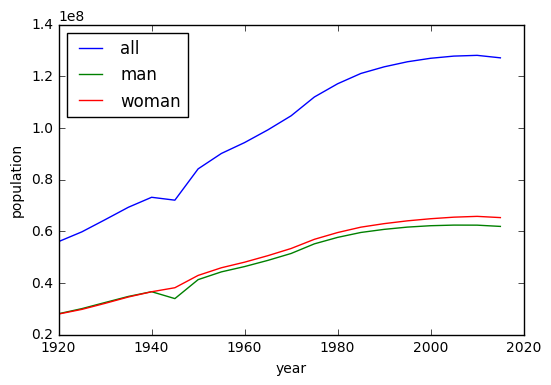

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
labels = ["all", "man", "woman"] # 凡例用（注：matplotlibは日本語が文字化けするため英語にしている）
plt.xlabel("year")
plt.ylabel("population")
for label, pop in zip(labels, [pop_all, pop_man, pop_woman]):
    plt.plot(year, pop, label=label)
plt.legend(loc="best")
plt.show()

戦争のときに男性の人口が減っていること、最近は全体が減少に転じつつあることが分かります。  
以上のことをまとめると次のセルのようになります。データの取得だけだと５行で書けていることになります。  
Pythonの文字列操作の関数自体はシンプルなものばかりですが、リスト内包表記のような組み込み関数と組み合わせると素早く必要な処理を行うことが出来ます。  
エクセルでできることをわざわざやっただけのように思えるかもしれませんが、numpyと組み合わせると、膨大なデータでも苦もなくプロットでき、非常に応用範囲が広いです。

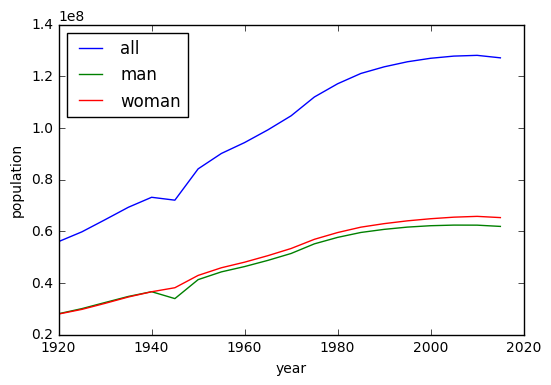

In [23]:
# 全体まとめ
with open("c01.csv", "r") as fp:
    lines = fp.readlines()[:-2]
lines_splited = [line.replace('"', "").strip().split(",") for line in lines]  
lines_全国 = [line for line in lines_splited if line[1] == "全国"]
year, pop_all, pop_man, pop_woman = [[int(line[i]) for line in lines_全国] for i in [-5, -3, -2, -1]]

import matplotlib.pyplot as plt
%matplotlib inline
labels = ["all", "man", "woman"]
plt.xlabel("year")
plt.ylabel("population")
for label, pop in zip(labels, [pop_all, pop_man, pop_woman]):
    plt.plot(year, pop, label=label)
plt.legend(loc="best")
plt.show()